In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Concatenate



In [8]:
import os

# Base directory where monument folders are located
base_dir = r"C:\Users\admin\Downloads\archive\Indian-monuments\Images\train"

# List of monument folders (adjust as per your folder structure)
monument_folders = ["qutub_minar",
"mysore_palace",
"lotus_temple",
"jamali_kamali_tomb",
"iron_pillar",
"hawa mahal pics",
"golden temple",
"charminar",
"basilica_of_bom_jesus",
"alai_minar",
"alai_darwaza",
"Sun Temple Konark",
"India gate pics",
"Khajuraho",
"Humayun_s Tomb",
"Gateway of India",
"Fatehpur Sikri",
"Ellora Caves",
"Chhota_Imambara",
"Charar-E- Sharif",
"Ajanta Caves",
"victoria memorial",
"tanjavur temple",
"tajmahal"

]

# Description for each monument (adjust as per your descriptions)
monument_descriptions = {
    "qutub_minar":("Qutub Minar, located in Delhi, India, is the tallest brick minaret in the world, standing at 73 meters. The minaret was commissioned by Qutb-ud-din Aibak in 1193 and completed by his successor, Iltutmish. "
        "The tower is a UNESCO World Heritage Site and is renowned for its intricate carvings, Arabic inscriptions, and stunning architectural design. The Qutb complex also includes the Quwwat-ul-Islam Mosque, the first mosque built in India, and the Iron Pillar, a remarkable example of ancient Indian metallurgy. "
        "Visitors can explore the minaret and the surrounding structures, learning about the history and significance of this iconic landmark. Qutub Minar is a testament to the architectural and cultural achievements of medieval India."
),
"mysore_palace":("Mysore Palace, also known as Amba Vilas Palace, is a historical palace located in Mysore, Karnataka, India. The palace, built in 1912, is the official residence of the Wadiyar dynasty and a prime example of Indo-Saracenic architecture. "
        "The palace is renowned for its grandeur, featuring ornate halls, intricate carvings, and beautiful paintings. The Durbar Hall, with its stained glass ceilings and chandeliers, and the Kalyana Mantapa, with its magnificent dome and peacock motifs, are some of the highlights. "
        "Visitors can explore the various rooms, courtyards, and gardens, and learn about the history and legacy of the Wadiyar rulers. The palace is illuminated with thousands of lights during special occasions, offering a breathtaking sight. Mysore Palace is a testament to the opulence and cultural heritage of the region."
),
"lotus_temple":( "The Lotus Temple, located in New Delhi, India, is a Bahá'í House of Worship and one of the most visited buildings in the world. Completed in 1986, the temple is renowned for its distinctive lotus-shaped design, featuring 27 free-standing marble-clad petals arranged in clusters of three to form nine sides. "
        "The temple is set amidst lush green gardens and offers a tranquil atmosphere for prayer and meditation. The interior of the temple is devoid of any idols or religious symbols, reflecting the Bahá'í faith's emphasis on the unity of all religions and the oneness of humanity. "
        "Visitors can explore the serene surroundings, participate in prayer sessions, and learn about the Bahá'í teachings and principles through various exhibits and programs. The Lotus Temple is a symbol of peace, spirituality, and architectural brilliance."
),
"jamali_kamali_tomb":("The Jamali Kamali Mosque and Tomb, located in the Mehrauli Archaeological Park in Delhi, India, are significant historical sites that date back to the early 16th century. The mosque and tomb are named after the Sufi saint Shaikh Jamali Kamboh and his companion Kamali. "
        "The mosque is renowned for its elegant architecture, featuring intricate carvings, calligraphy, and detailed stucco work. The tomb, located adjacent to the mosque, houses the graves of Jamali and Kamali and is adorned with beautiful inlay work and frescoes. "
        "Visitors can explore the peaceful surroundings, learn about the history and significance of the site, and enjoy the serene ambiance of the Mehrauli Archaeological Park. The Jamali Kamali Mosque and Tomb are important landmarks in Delhi's rich cultural and architectural heritage."
),
"iron_pillar":("The Iron Pillar, located in the Qutb complex in Delhi, India, is a remarkable example of ancient Indian metallurgy. The pillar, standing at 7.2 meters high, was erected by Chandragupta II in the 4th century CE and has remained rust-free for over 1600 years. "
        "The pillar is renowned for its inscriptions in Sanskrit, which praise the accomplishments of the Gupta dynasty, and its smooth, polished surface. "
        "Visitors can explore the pillar and the surrounding structures in the Qutb complex, which includes the Qutub Minar and other historical monuments. The Iron Pillar is a testament to the advanced scientific knowledge and craftsmanship of ancient India."
),
"hawa mahal pics":("Hawa Mahal, also known as the 'Palace of Winds', is a stunning five-story palace located in the heart of Jaipur, Rajasthan, India. Built in 1799 by Maharaja Sawai Pratap Singh, the palace is renowned for its distinctive honeycomb structure and 953 small windows, called jharokhas, which allow the breeze to flow through, keeping the palace cool. "
        "The Hawa Mahal was designed by Lal Chand Ustad and is constructed from red and pink sandstone, reflecting the architectural style of the Rajputana era. The palace was originally built for the royal women to observe street festivals and daily life without being seen. "
        "Visitors can explore the beautifully decorated rooms, the museum showcasing artifacts from the royal era, and the panoramic views of the city from the top floors. Hawa Mahal is an iconic symbol of Jaipur and a testament to the city's rich cultural heritage."
),
"golden temple":( "The Golden Temple, also known as Sri Harmandir Sahib, is the holiest gurdwara and the most important pilgrimage site of Sikhism. Located in Amritsar, Punjab, India, the temple was built in the late 16th century by Guru Arjan, the fifth Sikh Guru. "
        "The temple is renowned for its stunning architecture, featuring a gold-plated façade and a dome that glistens in the sunlight. The temple complex includes the sacred Amrit Sarovar (pool of nectar) and the Akal Takht, the highest seat of earthly authority for the Sikhs. "
        "Visitors can experience the serene ambiance, participate in the langar (community kitchen) that serves free meals to all, and explore the Sikh history and culture through the various exhibits. The Golden Temple is a symbol of equality, spirituality, and community service."
),
"charminar":("Charminar, an iconic monument located in Hyderabad, Telangana, India, was built in 1591 by Muhammad Quli Qutb Shah, the fifth ruler of the Qutb Shahi dynasty. The structure, with its four grand arches and four minarets, stands at the heart of the old city and is a symbol of Hyderabad's rich history and culture. "
        "The Charminar is renowned for its intricate stucco decorations and its strategic location at the intersection of the historical trade routes. Visitors can climb to the upper floors for a panoramic view of the bustling markets and surrounding areas. "
        "Nearby attractions include the Laad Bazaar, famous for its bangles, and the Mecca Masjid, one of the largest mosques in India. The Charminar is a must-visit destination for anyone looking to experience the vibrant heritage and architectural brilliance of Hyderabad."
),
"basilica_of_bom_jesus":("The Basilica of Bom Jesus, located in Old Goa, India, is one of the oldest and most famous churches in the country. Built in 1605, the basilica is a UNESCO World Heritage Site and is renowned for housing the mortal remains of St. Francis Xavier. "
        "The church is a prime example of Baroque architecture with its ornate façade, detailed altars, and intricately carved wooden panels. The interior features beautiful frescoes, sculptures, and a silver casket containing the saint's relics. "
        "Visitors can attend mass, explore the church's rich history through the various artifacts and displays, and experience the spiritual ambiance of this sacred site. The Basilica of Bom Jesus is an important pilgrimage destination and a testament to Goa's colonial past and Christian heritage."
),
"alai_minar":("Alai Minar, an unfinished tower in the Qutb complex, Delhi, India, was intended to be twice the height of the Qutub Minar. Commissioned by Sultan Alauddin Khalji in the early 14th century, the construction was abandoned after his death, leaving the tower at a height of 24.5 meters. "
        "The base of the Alai Minar is a massive circular structure made of rough stone blocks, giving visitors an idea of the grand scale that was envisioned for the tower. "
        "Visitors can explore the ruins and imagine the ambitious project that Khalji had planned. The Alai Minar is part of the larger Qutb complex, which includes several other historical structures, making it a fascinating site for history and architecture enthusiasts."
),
"alai_darwaza":("Alai Darwaza, the southern gateway of the Quwwat-ul-Islam Mosque in the Qutb complex, Delhi, India, is a masterpiece of Indo-Islamic architecture. Built in 1311 by Alauddin Khalji, the gateway features intricate carvings, beautiful calligraphy, and exquisite inlay work in white marble and red sandstone. "
        "The Alai Darwaza is renowned for its horseshoe-shaped arches, elaborate lattice screens, and geometric patterns that reflect the architectural innovations introduced during the Khalji dynasty. "
        "Visitors can explore the gateway and the surrounding structures in the Qutb complex, which includes the famous Qutub Minar, the tallest brick minaret in the world. The Alai Darwaza stands as a testament to the rich cultural heritage and architectural brilliance of medieval India."
),
"Sun Temple Konark":("Sun Temple Konark, also known as the Black Pagoda, is a 13th-century temple located in Odisha, India. Dedicated to the Hindu Sun God, Surya, the temple is an architectural marvel designed in the shape of a colossal chariot with twelve pairs of elaborately carved stone wheels and seven horses. "
        "Built by King Narasimhadeva I of the Eastern Ganga dynasty, the temple is a UNESCO World Heritage Site and is renowned for its stunning Kalinga architecture and intricate sculptures depicting various deities, animals, and everyday life. "
        "Visitors can explore the ruins of the main temple, the intricately carved wheels, and the nearby ASI museum that houses artifacts from the site. The Sun Temple Konark is a testament to the artistic and engineering prowess of ancient India and a must-visit destination for history and architecture enthusiasts."
),
"India gate pics":("India Gate, situated in New Delhi, India, is a war memorial dedicated to the soldiers of the Indian Army who lost their lives in various wars. "
        "Designed by Sir Edwin Lutyens, the monument was completed in 1931. It stands as a symbol of sacrifice and patriotism, with the names of soldiers inscribed on its walls. "
        "The structure is inspired by the Arc de Triomphe in Paris and is surrounded by lush lawns, making it a popular spot for visitors and picnickers alike."),
"Khajuraho":("Khajuraho, located in Madhya Pradesh, India, is famous for its group of Hindu and Jain temples that are renowned for their exquisite carvings and intricate sculptures. Built between 950 and 1050 AD by the Chandela dynasty, these temples are a UNESCO World Heritage Site. "
        "The temples are divided into three groups: Western, Eastern, and Southern. The Western Group, which includes the Kandariya Mahadeva Temple, is the most famous for its stunning architecture and detailed erotic sculptures that depict various aspects of life, mythology, and spirituality. "
        "Visitors can explore the beautifully preserved temples, marvel at the artistic craftsmanship, and learn about the history and significance of these sacred structures. Khajuraho offers a unique glimpse into India's medieval temple architecture and the rich cultural heritage of the Chandela rulers."
),
"Humayun_s Tomb":("Humayun's Tomb, located in Delhi, India, is a magnificent mausoleum built in 1570 by Hamida Banu Begum, Humayun's widow. "
        "It is one of the finest examples of Mughal architecture and inspired the construction of the Taj Mahal. "
        "Surrounded by beautiful gardens, pools, and other Mughal-style structures, the tomb is a UNESCO World Heritage site and a testament to the artistic and architectural skills of the Mughal era."
),
"Gateway of India":("Gateway of India, located in Mumbai, Maharashtra, is one of India's most iconic landmarks. Built in 1924 to commemorate the visit of King George V and Queen Mary to India, this grand archway stands on the waterfront of Apollo Bunder. "
        "The structure, designed by architect George Wittet, combines elements of Hindu and Muslim architectural styles, with its central dome and intricate latticework. The Gateway of India served as a ceremonial entrance to India during the British colonial era. "
        "Today, it is a popular tourist destination and a starting point for ferries to Elephanta Island. Visitors can enjoy the vibrant atmosphere, the stunning view of the Arabian Sea, and the historical significance of this monumental structure. It is a testament to Mumbai's colonial past and a symbol of the city's cosmopolitan character."
),
"Fatehpur Sikri":("Fatehpur Sikri, located in Uttar Pradesh, India, is a historic city founded by Mughal Emperor Akbar in the late 16th century. This UNESCO World Heritage Site served as the capital of the Mughal Empire for 14 years before it was abandoned due to water scarcity. "
        "The city is an architectural masterpiece that showcases the grandeur of the Mughal era, with structures made from red sandstone. Key attractions include the Buland Darwaza, the largest gateway in the world; the Jama Masjid, a magnificent mosque; and the Panch Mahal, a five-story palatial structure. "
        "Visitors can also explore the Diwan-i-Khas, a hall for private audiences, and the tomb of Salim Chishti, a revered Sufi saint. Fatehpur Sikri offers a glimpse into the rich history and architectural brilliance of the Mughal period, making it a must-visit destination for history enthusiasts."
),
"Ellora Caves":("Ellora Caves, located near Aurangabad in Maharashtra, India, are one of the largest rock-cut monastery-temple cave complexes in the world, representing the epitome of ancient Indian rock-cut architecture. Spanning from the 6th to the 10th century CE, these 34 caves are a UNESCO World Heritage Site and showcase a harmonious coexistence of Buddhism, Hinduism, and Jainism. "
        "The most remarkable structure is the Kailasa temple (Cave 16), a monolithic rock excavation dedicated to Lord Shiva, which is considered an engineering marvel for its vertical excavation and intricate carvings. Other notable caves include Cave 10 (Vishvakarma Cave), Cave 12 (Tin Thal), and Cave 32 (Indra Sabha). "
        "Visitors can explore the detailed sculptures and frescoes that adorn these caves, reflecting the rich cultural and religious history of ancient India. Guided tours provide deep insights into the significance and stories behind these monumental creations."
    ),
"Chhota_Imambara":("Chhota Imambara, also known as Imambara of Hussainabad, is a majestic monument located in Lucknow, Uttar Pradesh, India. It was constructed in 1838 by Muhammad Ali Shah, the third Nawab of Awadh, primarily as a congregation hall for Shia Muslims. "
        "The Imambara serves as the mausoleum for the Nawab and his mother, and is renowned for its splendid architecture, which blends Islamic and Indo-Persian styles. The interiors are adorned with elaborate chandeliers, stunning glasswork, and intricate calligraphy. "
        "Visitors can explore the main hall, which houses the tombs, and the surrounding gardens that add to the monument's charm. The Chhota Imambara is illuminated during special occasions, offering a mesmerizing sight. It is a significant historical and cultural landmark in Lucknow's rich heritage."),
"Charar-E- Sharif":("Charar-E-Sharif, situated in the picturesque valley of Kashmir in Jammu and Kashmir, India, is one of the oldest and most revered shrines in the region. Dedicated to Sheikh Noor-ud-din Noorani, also known as Nund Rishi, the shrine dates back to the 14th century. "
        "Nund Rishi was a revered Sufi saint who preached love, tolerance, and harmony. The shrine reflects traditional Kashmiri architecture with its wooden structure and intricate carvings. "
        "Pilgrims from across the country visit Charar-E-Sharif to seek blessings and experience the spiritual tranquility of the place. The town around the shrine offers a peaceful retreat with its serene environment and beautiful landscapes, making it a perfect destination for spiritual and nature enthusiasts."),
"Ajanta Caves":("Ajanta Caves, located in Maharashtra, India, are a series of 29 rock-cut cave monuments created between the 2nd century BCE and the 6th century CE. These caves were used as a monastic retreat for Buddhist monks and are renowned for their stunning murals and sculptures depicting the Jataka tales, which narrate the previous lives of the Buddha. "
        "The caves are nestled in a panoramic gorge and were rediscovered in 1819 by a British officer. The most notable caves include Cave 1, with its impressive Bodhisattva murals, and Cave 26, featuring a massive reclining Buddha. "
        "Visitors can take guided tours to explore the intricate carvings and paintings that offer insights into ancient Buddhist art and teachings. The site is a UNESCO World Heritage Site and a testament to the architectural and artistic achievements of ancient India."),
"victoria memorial":("The Victoria Memorial, located in Kolkata, West Bengal, India, is a grand marble building built in memory of Queen Victoria. Completed in 1921, the memorial is a prime example of Indo-Saracenic architecture, featuring a blend of British and Mughal styles. "
        "The memorial houses a museum that showcases a vast collection of artifacts, paintings, and sculptures related to British India and the life of Queen Victoria. The lush gardens surrounding the memorial add to its beauty and offer a peaceful retreat. "
        "Visitors can explore the various galleries, learn about the colonial history of India, and enjoy the serene ambiance of the gardens. The Victoria Memorial is an important historical landmark and a symbol of Kolkata's rich cultural heritage."
),
"tanjavur temple":("The Brihadeeswarar Temple, also known as Tanjavur Temple, is a Hindu temple located in Thanjavur, Tamil Nadu, India. Built by Raja Raja Chola I in the 11th century, the temple is dedicated to Lord Shiva and is a UNESCO World Heritage Site. "
        "The temple is renowned for its grandeur, featuring a massive vimana (tower) that stands at 66 meters, intricate carvings, and beautiful frescoes. The temple complex includes several shrines, mandapas, and a large courtyard. "
        "Visitors can explore the various structures, admire the detailed artwork, and learn about the history and significance of the Chola dynasty. The Brihadeeswarar Temple is a testament to the architectural and artistic achievements of ancient India."
),
"tajmahal":( "The Taj Mahal, located in Agra, Uttar Pradesh, India, is one of the most famous monuments in the world. Built by Mughal Emperor Shah Jahan in memory of his beloved wife Mumtaz Mahal, the Taj Mahal is a symbol of eternal love and an architectural masterpiece. "
        "Completed in 1653, the white marble mausoleum features intricate inlay work with precious stones, beautiful gardens, and a reflecting pool that enhances its beauty. The central dome, flanked by four minarets, and the detailed calligraphy and floral designs are some of the highlights. "
        "Visitors can explore the main tomb, the surrounding gardens, and the nearby structures, including the mosque and the guest house. The Taj Mahal is a UNESCO World Heritage Site and a must-visit destination for anyone traveling to India."
)
   
}

# Create captions.txt file in the base directory
caption_file_path = os.path.join(base_dir, "captions.txt")
with open(caption_file_path, "w", encoding='utf-8') as file:
    for monument_folder in monument_folders:
        folder_path = os.path.join(base_dir, monument_folder)
        if not os.path.exists(folder_path):
            print(f"Folder '{monument_folder}' does not exist. Skipping...")
            continue
        
        description = monument_descriptions.get(monument_folder, "No description available")
        
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                file.write(f"{os.path.join(folder_path, filename)}\t{description}\n")

print("Final_captions.txt file has been created successfully at:", caption_file_path)


Final_captions.txt file has been created successfully at: C:\Users\admin\Downloads\archive\Indian-monuments\Images\train\captions.txt


In [20]:
import os

# Function to load captions from a file
def load_captions(caption_file, encoding='utf-8'):
    try:
        with open(caption_file, 'r', encoding=encoding) as f:
            captions = f.readlines()
        captions = [caption.strip().split('\t') for caption in captions]
    except FileNotFoundError:
        print(f"Error: File '{caption_file}' not found.")
        captions = []
    except UnicodeDecodeError:
        print(f"Error: Unable to decode file '{caption_file}' with encoding '{encoding}'.")
        captions = []
    return captions

# Example paths to your dataset
base_dir = r'C:\Users\admin\Downloads\archive\Indian-monuments\Images\train'
caption_file_train = os.path.join(base_dir, 'captions.txt')

# Load captions for training
captions_train = load_captions(caption_file_train)

# Display loaded captions
print("Number of captions loaded:", len(captions_train))
print("Sample caption:", captions_train[0] if captions_train else "No captions loaded")


Number of captions loaded: 3131
Sample caption: ['C:\\Users\\admin\\Downloads\\archive\\Indian-monuments\\Images\\train\\qutub_minar\\img1.jpg', 'Qutub Minar, located in Delhi, India, is the tallest brick minaret in the world, standing at 73 meters. The minaret was commissioned by Qutb-ud-din Aibak in 1193 and completed by his successor, Iltutmish. The tower is a UNESCO World Heritage Site and is renowned for its intricate carvings, Arabic inscriptions, and stunning architectural design. The Qutb complex also includes the Quwwat-ul-Islam Mosque, the first mosque built in India, and the Iron Pillar, a remarkable example of ancient Indian metallurgy. Visitors can explore the minaret and the surrounding structures, learning about the history and significance of this iconic landmark. Qutub Minar is a testament to the architectural and cultural achievements of medieval India.']


Number of captions loaded: 3131


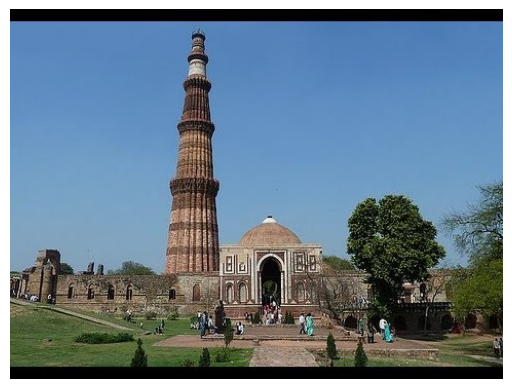

Caption: Qutub Minar, located in Delhi, India, is the tallest brick minaret in the world, standing at 73 meters. The minaret was commissioned by Qutb-ud-din Aibak in 1193 and completed by his successor, Iltutmish. The tower is a UNESCO World Heritage Site and is renowned for its intricate carvings, Arabic inscriptions, and stunning architectural design. The Qutb complex also includes the Quwwat-ul-Islam Mosque, the first mosque built in India, and the Iron Pillar, a remarkable example of ancient Indian metallurgy. Visitors can explore the minaret and the surrounding structures, learning about the history and significance of this iconic landmark. Qutub Minar is a testament to the architectural and cultural achievements of medieval India.


In [21]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

# Function to load captions from a file
def load_captions(caption_file, encoding='utf-8'):
    try:
        with open(caption_file, 'r', encoding=encoding) as f:
            captions = f.readlines()
        captions = [caption.strip().split('\t') for caption in captions]
    except FileNotFoundError:
        print(f"Error: File '{caption_file}' not found.")
        captions = []
    except UnicodeDecodeError:
        print(f"Error: Unable to decode file '{caption_file}' with encoding '{encoding}'.")
        captions = []
    return captions

# Example paths to your dataset
base_dir = r'C:\Users\admin\Downloads\archive\Indian-monuments\Images\train'
caption_file_train = os.path.join(base_dir, 'captions.txt')

# Load captions for training
captions_train = load_captions(caption_file_train)

# Display loaded captions
print("Number of captions loaded:", len(captions_train))

# Function to display image with caption
def display_image_with_caption(image_path, caption):
    try:
        # Load and display image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Print caption
        print("Caption:", caption)
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")

# Display sample image with caption
if captions_train:
    sample_image_path = captions_train[0][0]  # Assuming first item is image path
    sample_caption = captions_train[0][1]  # Assuming second item is caption

    display_image_with_caption(sample_image_path, sample_caption)
else:
    print("No captions loaded")


In [31]:
import os

# Base directory where test folders are located
base_dir = r'C:\Users\admin\Downloads\archive\Indian-monuments\Images\test'

# List of monument folders (adjust as per your folder structure)
test_monument_folders = [
    "iron_pillar",
    "golden temple",
    "basilica_of_bom_jesus",
    "charminar",
    "alai_minar",
    "alai_darwaza",
    "Sun Temple Konark",
    "Khajuraho",
    "India_gate",
    "Hawa mahal",
    "Humayun_s Tomb",
    "Fatehpur Sikri",
    "Gateway of India",
    "Ellora Caves",
    "Chhota_Imambara",
    "Ajanta Caves",
    "Charar-E- Sharif",
    "tanjavur temple",
    "victoria memorial",
    "tajmahal",
    "qutub_minar",
    "mysore_palace",
    "jamali_kamali_tomb",
    "lotus_temple"
]

# Description for each monument (adjust as per your descriptions)
test_monument_descriptions = {
    "iron_pillar": ("The Iron Pillar, standing tall in Delhi's Qutb complex, is an engineering marvel from the 4th century CE, testament to ancient Indian metallurgy."
                    "Surprisingly rust-free due to its composition, it bears Sanskrit inscriptions praising King Chandragupta II. This historical artifact, amidst the Qutub Minar and"
                    "Quwwat-ul-Islam Mosque, reflects Gupta period's scientific prowess and India's rich cultural heritage."),
    
    "golden temple": ("The Golden Temple, or Sri Harmandir Sahib, located in Amritsar, Punjab, India, is the holiest gurdwara and a symbol of Sikhism's spiritual and cultural legacy. "
                      "Built in the 16th century by Guru Arjan Dev, the temple features a stunning gold-plated exterior and houses the sacred Guru Granth Sahib. "
                      "The temple complex includes the Amrit Sarovar, a holy pool believed to possess healing powers, and the Akal Takht, a seat of Sikh religious authority. "
                      "Every day, thousands of devotees and visitors gather here to experience its serene atmosphere and partake in the community kitchen serving free meals (langar), embodying Sikh principles of equality and service."),
    
    "basilica_of_bom_jesus": ("The Basilica of Bom Jesus, located in Old Goa, India, is a UNESCO World Heritage Site and a symbol of Goa's rich Christian heritage. "
                               "Built in the 17th century, the basilica is renowned for housing the mortal remains of St. Francis Xavier, a revered Jesuit missionary. "
                               "Its Baroque architecture features a beautifully adorned façade, intricate wooden altars, and exquisite paintings depicting scenes from the life of St. Francis Xavier. "
                               "Pilgrims and tourists flock to this sacred site to witness its spiritual aura, attend mass in its historic chapel, and explore the museum showcasing artifacts from Goa's colonial past."),
    
    "charminar": ("Charminar, located in the heart of Hyderabad, Telangana, India, is a majestic monument that stands as an icon of the city's cultural heritage. "
                  "Built in 1591 by Sultan Muhammad Quli Qutb Shah, the structure boasts four grand arches and minarets, offering panoramic views of the bustling old city. "
                  "Its Indo-Islamic architecture is adorned with intricate stucco work and elegant calligraphy, reflecting the artistic prowess of the Qutb Shahi dynasty. "
                  "Surrounded by vibrant markets and historical landmarks like the Mecca Masjid and Laad Bazaar, Charminar continues to be a hub of cultural activity and a must-visit for tourists exploring Hyderabad."),
    
    "alai_minar": ("Alai Minar, an unfinished tower in the Qutb complex, Delhi, India, was commissioned by Sultan Alauddin Khalji in the 14th century to surpass the height of the Qutub Minar. "
                   "Despite remaining incomplete at 24.5 meters, its massive base and intricate architectural design showcase Khalji's ambitious vision. "
                   "The tower stands amidst other historical marvels like the Quwwat-ul-Islam Mosque and Alai Darwaza, offering visitors insights into medieval Indian architecture and the cultural legacy of the Khalji dynasty."),
    
    "alai_darwaza": ("Alai Darwaza, located in the Qutb complex, Delhi, India, is a masterpiece of Indo-Islamic architecture built by Sultan Alauddin Khalji in 1311. "
                      "Known for its exquisite craftsmanship, the gateway features horseshoe-shaped arches, intricate lattice screens, and elaborate geometric patterns in red sandstone and white marble. "
                      "It stands as a tribute to Khalji's patronage of art and culture during the Delhi Sultanate, complementing the nearby Qutub Minar and Quwwat-ul-Islam Mosque with its architectural grandeur."),
    
    "Sun Temple Konark": ("The Sun Temple Konark, also known as the Black Pagoda, is a 13th-century architectural marvel dedicated to the Hindu Sun God, Surya, in Odisha, India. "
                          "Designed as a colossal chariot with intricately carved stone wheels and seven horses, the temple exemplifies Kalinga architecture's aesthetic and engineering prowess. "
                          "Its walls depict intricate sculptures of deities, celestial beings, and daily life, offering a glimpse into Odisha's cultural and religious heritage during the Eastern Ganga dynasty."),
    
    "Khajuraho": ("Khajuraho, located in Madhya Pradesh, India, is renowned for its group of Hindu and Jain temples built between the 10th and 12th centuries by the Chandela dynasty. "
                   "These UNESCO World Heritage Sites feature exquisite carvings and sculptures that depict various aspects of life, mythology, and spirituality. "
                   "The Western Group of Temples, including the Kandariya Mahadeva Temple, stands out for its architectural grandeur and intricate erotic sculptures, reflecting Khajuraho's artistic and cultural splendor."),
    
    "India_gate": ("India Gate, situated in New Delhi, India, is a war memorial built in memory of the Indian soldiers who sacrificed their lives during World War I and the Afghan Wars. "
                   "Designed by Sir Edwin Lutyens, the monument's arch stands as a symbol of India's valor and sacrifice, with the names of soldiers inscribed on its walls. "
                   "Surrounded by lush lawns and illuminated at night, India Gate serves as a popular gathering spot for both tourists and locals, commemorating the nation's history and honoring its heroes."),
    
    "Hawa mahal": ("Hawa Mahal, also known as the 'Palace of Winds', is a majestic five-story palace in Jaipur, Rajasthan, India, built in 1799 by Maharaja Sawai Pratap Singh. "
                   "Its honeycomb façade features 953 small windows (jharokhas) that allow cool air to circulate, keeping the palace comfortable during Jaipur's scorching summers. "
                   "Designed by Lal Chand Ustad in pink and red sandstone, Hawa Mahal served as a private retreat for royal women to observe street festivities without being seen. "
                   "Today, it stands as an architectural gem and a symbol of Jaipur's rich cultural heritage, attracting visitors with its ornate interiors and panoramic views."),
    
    "Humayun_s Tomb": ("Humayun's Tomb, located in Delhi, India, is a magnificent mausoleum built in 1570 by Hamida Banu Begum, wife of Mughal Emperor Humayun. "
                       "It is one of the earliest examples of Mughal architecture and inspired the construction of the Taj Mahal. "
                       "Surrounded by lush gardens and water channels in the Persian charbagh style, the tomb features intricate lattice work, white marble domes, and red sandstone facades. "
                       "A UNESCO World Heritage Site, Humayun's Tomb is a testament to the grandeur and artistic excellence of the Mughal era, attracting visitors with its serene ambiance and historical significance."),
    
    "Fatehpur Sikri": ("Fatehpur Sikri, located in Uttar Pradesh, India, was founded by Mughal Emperor Akbar in the 16th century as the capital of the Mughal Empire. "
                        "This UNESCO World Heritage Site showcases a blend of Persian, Islamic, and Indian architectural styles, with highlights including the Buland Darwaza, Jama Masjid, and Panch Mahal. "
                        "The city, built entirely of red sandstone, was abandoned after 14 years due to water scarcity, leaving behind a well-preserved complex of palaces, mosques, and courtyards. "
                        "Fatehpur Sikri remains a marvel of Mughal urban planning and craftsmanship, offering insights into the empire's cultural diversity and architectural innovations."),
    
    "Gateway of India": ("Gateway of India, located in Mumbai, Maharashtra, India, is an iconic archway overlooking the Arabian Sea. "
                         "Built in 1924 to commemorate the visit of King George V and Queen Mary to India, the monument served as the ceremonial entrance during the British Raj. "
                         "Its Indo-Saracenic architecture blends Hindu and Muslim architectural styles, featuring intricate latticework and bas-reliefs depicting historical events. "
                         "Surrounded by bustling promenades and overlooking the Taj Mahal Palace Hotel, the Gateway of India remains a popular landmark and a symbol of Mumbai's colonial past and maritime significance."),
    
    "Ellora Caves": ("Ellora Caves, located in Maharashtra, India, is a UNESCO World Heritage Site showcasing rock-cut caves and temples dedicated to Buddhism, Hinduism, and Jainism. "
                     "Built between the 6th and 10th centuries, the complex comprises 34 caves with intricate carvings and sculptures depicting religious deities, mythological tales, and daily life. "
                     "The Kailasa Temple, carved from a single rock, stands out for its architectural grandeur and spiritual significance, attracting pilgrims and historians alike. "
                     "Ellora Caves exemplify India's religious harmony and architectural excellence, offering a glimpse into the country's rich cultural tapestry and ancient craftsmanship."),
    
    "Chhota_Imambara": ("Chhota Imambara, located in Lucknow, Uttar Pradesh, India, is an architectural marvel built by Nawab Muhammad Ali Shah in the 19th century. "
                         "Also known as the Hussainabad Imambara, the complex includes a mosque, a stunning main hall adorned with chandeliers and Belgian glasswork, and an ornate silver throne. "
                         "Its exquisite domes and minarets feature intricate calligraphy and Persian-style gardens, creating a serene ambiance for visitors. "
                         "During Muharram, the complex hosts processions and rituals in honor of Imam Hussain, attracting devotees and tourists with its cultural significance and architectural splendor."),
    
    "Ajanta Caves": ("Ajanta Caves, located in Maharashtra, India, are a UNESCO World Heritage Site renowned for their ancient rock-cut Buddhist caves and exquisite murals. "
                     "Dating back to the 2nd century BCE to the 6th century CE, the caves depict scenes from Buddha's life, Jataka tales, and daily life in ancient India. "
                     "The frescoes and sculptures, executed by skilled artisans, showcase vibrant colors and intricate details that reflect India's artistic heritage and spiritual depth. "
                     "Ajanta Caves continue to inspire visitors with their architectural beauty and cultural significance, offering a glimpse into the rich tapestry of ancient Indian civilization."),
    
    "Charar-E- Sharif": ("Charar-e-Sharif, located in Jammu and Kashmir, India, is a shrine dedicated to Sufi saint Sheikh Noor-ud-din Noorani. "
                          "Built in the 14th century, the shrine is a symbol of Kashmiri Sufi culture and religious harmony. "
                          "Its wooden architecture, featuring intricately carved motifs and a traditional Kashmiri pyramid roof, reflects the region's architectural heritage. "
                          "Despite being destroyed multiple times, Charar-e-Sharif remains a place of pilgrimage and spiritual significance, attracting devotees and tourists with its historical charm and cultural resonance."),
    
    "tanjavur temple": ("The Brihadeeswarar Temple, also known as the Big Temple, is a Hindu temple dedicated to Lord Shiva located in Thanjavur, Tamil Nadu, India. "
                        "Built by Emperor Raja Raja Chola I in the 11th century, it is an architectural marvel showcasing Dravidian temple architecture. "
                        "The temple complex includes a massive central dome (vimana) capped with a monolithic granite stone weighing around 80 tons. "
                        "Its intricate sculptures, frescoes, and a towering 13-tiered gateway (gopuram) illustrate Tamil Nadu's cultural and religious heritage, attracting devotees and historians alike."),
    
    "victoria memorial": ("The Victoria Memorial, located in Kolkata, West Bengal, India, is a grand marble monument dedicated to Queen Victoria of the United Kingdom. "
                          "Built in the early 20th century, the memorial features Indo-Saracenic revival architecture with elements of Mughal and British styles. "
                          "Surrounded by sprawling gardens and reflective pools, it houses a museum showcasing India's colonial history through paintings, artifacts, and memorabilia. "
                          "The memorial stands as a symbol of Kolkata's cultural identity and serves as a popular tourist destination and cultural hub for exhibitions, concerts, and public events."),
    
    "tajmahal": ("The Taj Mahal, located in Agra, Uttar Pradesh, India, is an iconic symbol of love and one of the Seven Wonders of the World. "
                 "Commissioned by Mughal Emperor Shah Jahan in memory of his wife Mumtaz Mahal, the marble mausoleum took over 20 years to build, employing thousands of artisans. "
                 "Its exquisite architecture features intricate marble inlay work, calligraphy, and symmetrical gardens representing paradise. "
                 "The Taj Mahal's ethereal beauty at sunrise and sunset, reflected in the Yamuna River, continues to captivate millions of visitors as a UNESCO World Heritage Site and enduring testament to eternal love."),
    
    "qutub_minar": ("Qutub Minar, located in Delhi, India, is a UNESCO World Heritage Site and the tallest brick minaret in the world. "
                    "Built in the early 13th century by Qutb-ud-din Aibak, the minaret stands at 73 meters, adorned with intricate carvings and verses from the Quran. "
                    "Surrounded by other historical structures like the Iron Pillar and Alai Darwaza, it serves as a symbol of Delhi's rich architectural heritage and the triumph of Islamic culture in the Indian subcontinent."),
    
    "mysore_palace": ("Mysore Palace, located in Mysore, Karnataka, India, is a magnificent royal residence and a prime example of Indo-Saracenic architecture. "
                       "Built in the early 20th century by the Wodeyar dynasty, the palace features opulent interiors with intricately carved doors, ceilings adorned with mythological paintings, and a Durbar Hall embellished with crystal chandeliers. "
                       "During the annual Dasara festival, the palace is illuminated with thousands of lights, showcasing its grandeur and cultural significance to visitors from around the world."),
    
    "jamali_kamali_tomb": ("Jamali-Kamali Tomb, located in Delhi, India, is a 16th-century monument known for its Indo-Islamic architecture and historical significance. "
                            "Named after Sufi saint Shaikh Jamali Kamboh and the adjacent Kamali, the tomb complex features a mosque, decorated with intricate blue tiles and calligraphy, and a courtyard surrounded by arched pavilions. "
                            "Its serene ambiance and architectural beauty attract history enthusiasts and devotees seeking spiritual solace amidst Delhi's bustling urban landscape."),
    
    "lotus_temple": ("The Lotus Temple, located in Delhi, India, is a Bahá'í House of Worship and a distinctive architectural marvel shaped like a lotus flower. "
                      "Designed by Iranian architect Fariborz Sahba, the temple features 27 free-standing marble-clad petals arranged in clusters to form nine sides. "
                      "Its serene interior offers a place of meditation and prayer for people of all religions, reflecting the Bahá'í principle of unity and equality. "
                      "Surrounded by lush gardens and reflecting pools, the Lotus Temple serves as a symbol of peace, harmony, and spiritual enlightenment amidst India's cultural diversity."),
}


# Path to save captions.txt file
captions_file = os.path.join(base_dir, 'captions.txt')

# Writing captions to captions.txt
with open(captions_file, 'w', encoding='utf-8') as f:
    for folder in test_monument_folders:
        folder_path = os.path.join(base_dir, folder)
        images = os.listdir(folder_path)
        for image in images:
            image_path = os.path.join(folder_path, image)
            if os.path.isfile(image_path):
                description = test_monument_descriptions.get(folder, "No description available")
                f.write(f"{image_path}\t{description}\n")

print(f"Captions file saved to: {captions_file}")




Captions file saved to: C:\Users\admin\Downloads\archive\Indian-monuments\Images\test\captions.txt


Number of captions loaded: 1059

Caption: The Iron Pillar, standing tall in Delhi's Qutb complex, is an engineering marvel from the 4th century CE, testament to ancient Indian metallurgy.Surprisingly rust-free due to its composition, it bears Sanskrit inscriptions praising King Chandragupta II. This historical artifact, amidst the Qutub Minar andQuwwat-ul-Islam Mosque, reflects Gupta period's scientific prowess and India's rich cultural heritage.



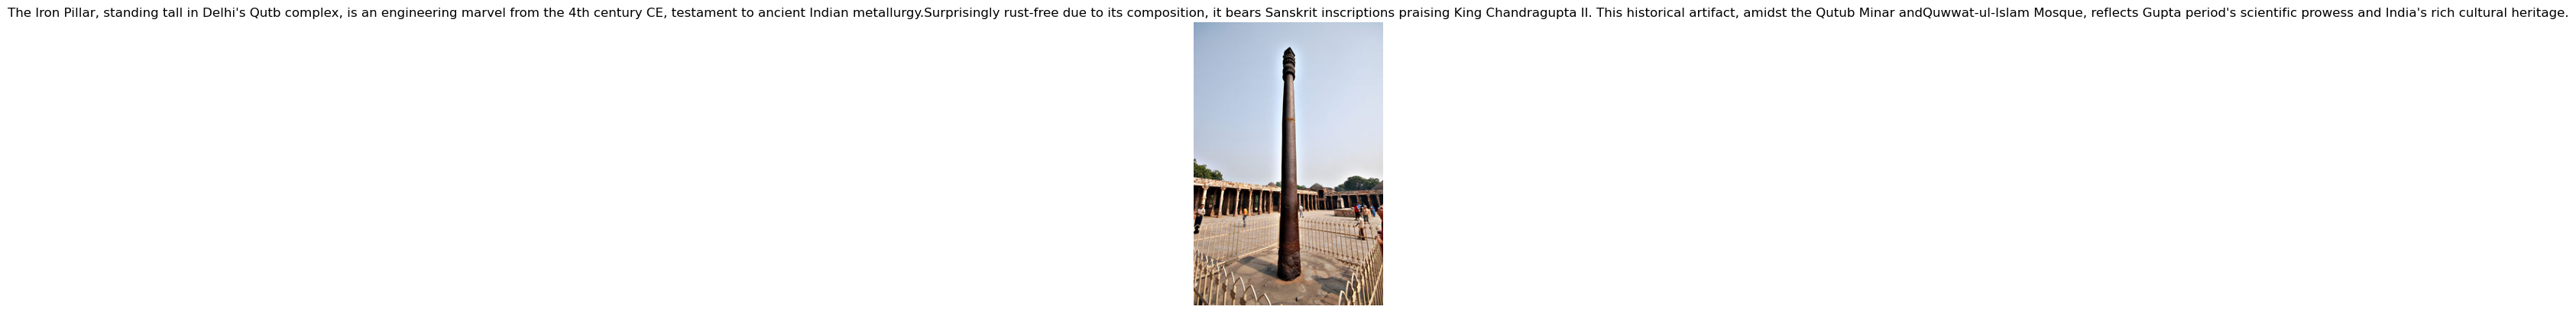

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

# Path to the base directory and the captions file
base_dir = r'C:\Users\admin\Downloads\archive\Indian-monuments\Images\test'
caption_file = os.path.join(base_dir, 'captions.txt')

# Function to read captions from the file
def read_captions(caption_file):
    captions = []
    with open(caption_file, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_path, description = parts
                captions.append((image_path, description))
    return captions

# Read captions from the file
captions = read_captions(caption_file)

# Display the first image and its caption
if captions:
    print(f"Number of captions loaded: {len(captions)}")
    
    # Display the first caption
    image_path, description = captions[0]
    print(f"\nCaption: {description}\n")

    # Load and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(description)
    plt.show()
else:
    print("No captions found.")
